<a href="https://colab.research.google.com/github/dbarrer5/milestone-02/blob/main/Fall_22_Practice_Final_Exam_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Final Practice Test: Wrangling Data with Python
This is a practice final test for BSAN 6030- Programming for Data Management. It involves ingesting, cleaning, wrangling, and visualizing large data using Python libraries.

## Case Background
The New York City Taxi and Limousine Commission (TLC), created in 1971, is the agency responsible for licensing and regulating New York City's Medallion (Yellow) taxi cabs, for-hire vehicles (e.g. Uber & Lyft), commuter vans, and paratransit vehicles. Over 200,000 TLC licensees complete approximately 1,000,000 trips each day.

Policy researchers at the TLC use data generated by the drivers to observe changing trends in the industry and inform decisions made by the agency and the City. Many of their analysis can be found in their blog at [edium.com/@NYCTLC](https://medium.com/@NYCTLC).

## Data Description
You may access [the full list of datasets here](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page). For this practice test, we will focus on the 2019 data for 'Yellow Taxi Trip Records'.

It contains the following fields:
* **VendorID:** A code indicating the TPEP provider that provided the record. 1= Creative Mobile Technologies, LLC; 2= VeriFone Inc. 
* **tpep_pickup_datetime:** The date and time when the meter was engaged. 
* **tpep_dropoff_datetime:** The date and time when the meter was disengaged. 
* **Passenger_count:** The number of passengers in the vehicle. This is a driver-entered value. 
* **Trip_distance:** The elapsed trip distance in miles reported by the taximeter. 
* **PULocationID:** TLC Taxi Zone in which the taximeter was engaged 
* **DOLocationID:** TLC Taxi Zone in which the taximeter was disengaged 
* **RateCodeID:** The final rate code in effect at the end of the trip. 1= Standard rate 2=JFK 3=Newark 4=Nassau or Westchester 5=Negotiated fare 6=Group ride 
* **Store_and_fwd_flag:** This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server. Y= store and forward trip N= not a store and forward trip 
* **Payment_type:** A numeric code signifying how the passenger paid for the trip. 1= Credit card 2= Cash 3= No charge 4= Dispute 5= Unknown 6= Voided trip 
* **Fare_amount:** The time-and-distance fare calculated by the meter. 
* **Extra:** Miscellaneous extras and surcharges. Currently, this only includes the $0.50 and 1 rush hour and overnight charges. 

* **MTA_tax:** $0.50 MTA tax that is automatically triggered based on the metered rate in use.

* **Improvement_surcharge:** $0.30 improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. 
* **Tip_amount:** Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. 
* **Tolls_amount:** Total amount of all tolls paid in trip. 
* **Total_amount:** The total amount charged to passengers. Does not include cash tips.


## Problem Steps
Please go through the following problems and produce the code that answers the problem. **Make sure you use exectly ONE CELL for each output expected to produce. Properly comment your code so it is easy to understand what it does.** 

##Data Ingestion & Cleaning


1. Read the data for the first three months of 2019 'Yellow Taxi Trip Records' into separate dataframes. Call them df1 to df3.

 **Hint 1:** the data is in parquet format, so you should use pd.read_parquet() to load them into dataframes.

 **Hint 2:** you may use the data's web URL inside the pd.read_parquet() to load the data directly from the URL.

In [ ]:
import pandas as pd

df1 = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2019-01.parquet')
df2 = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2019-02.parquet')
df3 = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2019-03.parquet')

2. Concatenate the above three datasets into one dataframe. Name the new dataframe df. Then check out df.info() to see the datatypes and memory size for df.

In [ ]:
df=pd.concat([df1,df2,df3])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22612607 entries, 0 to 7866619
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee          

3. Reduce the size of df by downcasting the following five columns to the smallest datatype possible: VendorID, passenger_count ,RatecodeID,	PULocationID,	DOLocationID.

 Use df.info() to check the new memory size of df.

In [ ]:
df.info()
cols = ['VendorID'	,'passenger_count'	,'RatecodeID',	'PULocationID',	'DOLocationID']
for col in cols:
    df[col]= pd.to_numeric(df[col],downcast='float')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22612607 entries, 0 to 7866619
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee          

4. Slice df for the rows with payment_type equal to 4 (disputed payments). Drop the payment_type column from the slice and store it as 'disputed'.

In [ ]:
disputed = df[df.payment_type==4]

disputed.drop('payment_type',axis=1,inplace=True)


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


5. In 'disputed' dataframe, drop every column and then every row with over 20% missing values. 

 Afterwards, fill the missing values with the average from their column.

In [ ]:
disputed = disputed.loc[disputed.isna().sum(axis=1)/len(disputed.columns) < 0.2,disputed.isna().sum()/len(disputed) < 0.2]

##Data Wrangling

6. Read the file ['Taxi Zone Lookup Table'](https://d37ci6vzurychx.cloudfront.net/misc/taxi+_zone_lookup.csv) from the NYC TLC website into a dataframe called 'zone'. It includes the Borough and Zone names of all LocationIDs in our ddf_disputed.

In [ ]:
zone = pd.read_csv('https://d37ci6vzurychx.cloudfront.net/misc/taxi+_zone_lookup.csv')
zone

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN


7. Merge 'disputed' with 'zone' using the ***PULoacationID*** column (trip origin) in 'disputed' and LocationID in 'zone'. The output should have all columns from both dataframes. Store the result in a variable called disputed_fromzone. 
 
 Then drop columns 'LocationID' and 'service_zone' which will not be needed.

In [ ]:
disputed_fromzone = pd.merge(disputed,zone,left_on='PULocationID',right_on='LocationID').drop(['service_zone','LocationID'],axis=1)
disputed_fromzone

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Borough,Zone
0,1.0,2019-01-01 00:40:33,2019-01-01 00:44:25,2.0,0.40,1.0,N,164.0,170.0,4.5,0.5,0.5,0.0,0.00,0.3,5.80,NaN,Manhattan,Midtown South
1,1.0,2019-01-01 05:42:52,2019-01-01 05:45:13,1.0,0.50,1.0,N,164.0,161.0,4.0,0.5,0.5,0.0,0.00,0.3,5.30,NaN,Manhattan,Midtown South
2,2.0,2019-01-01 06:49:59,2019-01-01 06:55:27,1.0,0.75,1.0,N,164.0,233.0,-6.0,0.0,-0.5,0.0,0.00,-0.3,-6.80,NaN,Manhattan,Midtown South
3,2.0,2019-01-01 12:22:33,2019-01-01 12:29:20,1.0,1.18,1.0,N,164.0,68.0,-7.0,0.0,-0.5,0.0,0.00,-0.3,-7.80,NaN,Manhattan,Midtown South
4,2.0,2019-01-01 13:15:19,2019-01-01 13:33:52,1.0,9.49,1.0,N,164.0,138.0,-27.5,0.0,-0.5,0.0,-5.76,-0.3,-34.06,NaN,Manhattan,Midtown South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38379,2.0,2019-03-20 19:04:44,2019-03-20 19:20:09,1.0,2.82,1.0,N,63.0,35.0,-12.5,-1.0,-0.5,0.0,0.00,-0.3,-14.30,0.0,Brooklyn,Cypress Hills
38380,1.0,2019-03-21 23:56:35,2019-03-22 00:54:20,1.0,46.70,5.0,Y,253.0,265.0,0.0,0.0,0.0,0.0,5.76,0.3,6.06,0.0,Queens,Willets Point
38381,1.0,2019-03-23 15:18:02,2019-03-23 15:20:04,1.0,0.20,1.0,N,214.0,214.0,3.5,0.0,0.5,0.0,0.00,0.3,4.30,0.0,Staten Island,South Beach/Dongan Hills
38382,2.0,2019-03-25 16:51:42,2019-03-25 16:59:53,1.0,0.01,1.0,N,202.0,202.0,-6.5,-1.0,-0.5,0.0,0.00,-0.3,-8.30,0.0,Manhattan,Roosevelt Island


8. This time merge 'disputed_fromzone' with 'zone' using the ***DOLoacationID*** column (trip destination) in 'disputed_fromzone' and LocationID in 'zone'. The output should have all columns from both dataframes. Store the result in a variable called disputed_fromtozone. 

 Check out how the names of the added columns are different for PULocationID and DOLocationID.
 
 Then drop columns 'LocationID' and 'service_zone' which will not be needed.

In [ ]:
disputed_fromtozone = pd.merge(disputed_fromzone,zone,
                          left_on='DOLocationID',
                          right_on='LocationID').drop(['service_zone','LocationID'],axis=1)
disputed_fromtozone

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Borough_x,Zone_x,Borough_y,Zone_y
0,1.0,2019-01-01 00:40:33,2019-01-01 00:44:25,2.0,0.40,1.0,N,164.0,170.0,4.5,...,0.5,0.0,0.00,0.3,5.80,NaN,Manhattan,Midtown South,Manhattan,Murray Hill
1,2.0,2019-01-01 16:02:07,2019-01-01 16:09:48,5.0,0.82,1.0,N,164.0,170.0,-6.5,...,-0.5,0.0,0.00,-0.3,-7.30,NaN,Manhattan,Midtown South,Manhattan,Murray Hill
2,2.0,2019-01-03 01:14:01,2019-01-03 01:18:47,1.0,0.45,1.0,N,164.0,170.0,-5.0,...,-0.5,0.0,0.00,-0.3,-6.30,NaN,Manhattan,Midtown South,Manhattan,Murray Hill
3,1.0,2019-01-03 17:16:15,2019-01-03 17:19:38,1.0,0.60,1.0,N,164.0,170.0,4.5,...,0.5,0.0,0.00,0.3,6.30,NaN,Manhattan,Midtown South,Manhattan,Murray Hill
4,1.0,2019-01-03 17:33:44,2019-01-03 17:38:23,1.0,0.60,1.0,N,164.0,170.0,5.0,...,0.5,0.0,0.00,0.3,6.80,NaN,Manhattan,Midtown South,Manhattan,Murray Hill
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38379,1.0,2019-01-15 22:37:30,2019-01-15 23:58:12,1.0,29.20,1.0,N,141.0,99.0,80.0,...,0.5,0.0,11.52,0.3,92.82,NaN,Manhattan,Lenox Hill West,Staten Island,Freshkills Park
38380,1.0,2019-02-11 19:16:17,2019-02-11 19:49:48,2.0,11.40,1.0,N,211.0,6.0,34.0,...,0.5,0.0,11.52,0.3,49.82,2.5,Manhattan,SoHo,Staten Island,Arrochar/Fort Wadsworth
38381,1.0,2019-01-19 06:53:26,2019-01-19 07:34:28,1.0,22.10,1.0,N,224.0,5.0,61.0,...,0.5,0.0,11.52,0.3,73.32,NaN,Manhattan,Stuy Town/Peter Cooper Village,Staten Island,Arden Heights
38382,2.0,2019-02-04 01:19:14,2019-02-04 01:19:23,1.0,0.17,1.0,N,70.0,57.0,-2.5,...,-0.5,0.0,0.00,-0.3,-3.80,0.0,Queens,East Elmhurst,Queens,Corona


##Data Aggregation &Visualization

9. Calculate and Display the number of trips for each combination of 'Borough_x' and 'Borough_y'. Store the result in a variable called 'tripno'. It should show the number of trips from 'Manhattan' to 'Manhattan' and from 'Manhattan' to 'Bronx' and every other two boroughs. 

In [ ]:
tripno = disputed_fromtozone.groupby(['Borough_x','Borough_y']).total_amount.count()
tripno

Borough_x      Borough_y    
Bronx          Bronx              176
               Brooklyn             7
               Manhattan           36
               Queens               2
               Unknown              8
Brooklyn       Bronx                8
               Brooklyn           777
               Manhattan           76
               Queens              37
               Unknown             15
EWR            EWR                 22
               Unknown              3
Manhattan      Bronx              495
               Brooklyn           978
               EWR                 54
               Manhattan        29233
               Queens            1070
               Staten Island       10
               Unknown            211
Queens         Bronx               88
               Brooklyn           342
               EWR                  6
               Manhattan          812
               Queens            2866
               Staten Island        8
               Unknow

10. Use **'tripno'** to calculate and display the total number of trips for each originating borough (Borough_x). Sort it descendingly and store the result in a variable called 'tripno_from'. It should show the total number of trips originating from 'Manhattan', 'Queens' and every other borough. 

In [ ]:
tripno_from = tripno.sum(level='Borough_x').sort_values(ascending=False)
tripno_from

<ipython-input-14-61192aa5d69e>:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  tripno_from = tripno.sum(level='Borough_x').sort_values(ascending=False)


Borough_x
Manhattan        32051
Queens            4246
Brooklyn           913
Unknown            912
Bronx              229
EWR                 25
Staten Island        8
Name: total_amount, dtype: int64

11. Use **'tripno_from'** to create a barplot that displays the total numer of trips originating from each borough. Make sure to set proper bar color, plot title, and axes labels. Rotate the borough names on the x axis to show them properly.

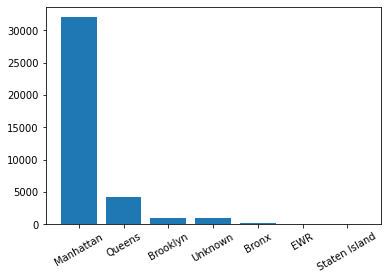

In [ ]:
import matplotlib.pyplot as plt

plt.bar(tripno_from.index, tripno_from)
plt.xticks(rotation=30)
plt.show()

12. Use 'disputed_fromtozone' to calculate and display the sum of 'total_amount' for each of the originating boroughs (Borough_x).

In [ ]:
total_amount = disputed_fromtozone.groupby('Borough_x').total_amount.sum()
total_amount

Borough_x
Bronx              2020.30
Brooklyn           5012.18
EWR                 103.05
Manhattan        218482.42
Queens            69253.44
Staten Island        24.88
Unknown            5032.44
Name: total_amount, dtype: float64

13. Use **total_amount** to create a pie chart and display the total fare paid for each originating borough (Borough_x). Make sure to properly label the portions of the pie chart with borough names. Explode the 'Queens' portion of the pie chart and properly title the pie plot.

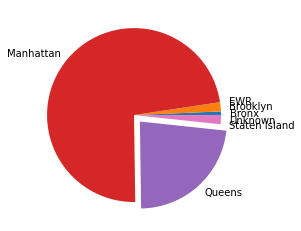

In [ ]:
plt.pie(total_amount,
        labels=total_amount.index,
        explode=(0,0,0,0,0.1,0,0))
plt.show()

14. Use 'disputed_fromtozone' to calculate and display the average 'trip_distance' and median 'total_amount' for each of the originating boroughs (Borough_x).

In [ ]:
dist_amount = disputed_fromtozone.groupby('Borough_x').agg({'trip_distance':'mean','total_amount':'median'})
dist_amount

,trip_distance,total_amount
Borough_x,,
Bronx,2.359651,3.80
Brooklyn,2.300383,4.30
EWR,2.436400,0.31
Manhattan,2.033377,8.30
Queens,6.471804,7.30
Staten Island,6.438750,3.30
Unknown,2.268750,4.30


15. Use **'dist_amount'** to create a line plot with two lines: the first line displays the average trip_distance for each borough, and the second line displays the median total_amount for each borough (both values are already calculated in dist_amount). 
 
 Make sure to set proper linestyle, line color, and marker for each line. Set proper legend, plt name, and axes labels. Rotate the borough names on the x axis to show them properly. 

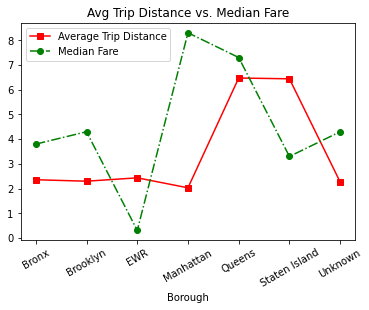

In [ ]:
plt.plot(dist_amount.trip_distance, marker='s',c='r',ls='-',label='Average Trip Distance')
plt.plot(dist_amount.total_amount, marker='o',c='g',ls='-.',label='Median Fare')
plt.title('Avg Trip Distance vs. Median Fare')
plt.xlabel('Borough')
plt.xticks(rotation=30)
plt.legend()
plt.show()

16. Create a function called 'borough_fare' that receives the name of a borough and return a bar plot that displays sum of 'total_amount' for each 'Zone' of the borough. Set proper plot title and axes labels for the plot. Rotate the borough names on the x axis for 90 degrees.

 Then call the function for 'Bronx' to see if it works well.

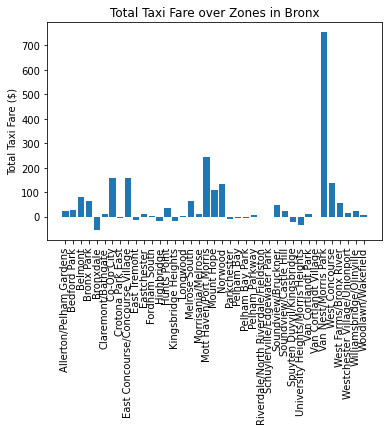

In [ ]:
def brou_func(boroughname):
    brou_data = disputed_fromtozone[disputed_fromtozone.Borough_x==boroughname]
    zone_sum = brou_data.groupby('Zone_x').total_amount.sum()
    plt.bar(zone_sum.index,zone_sum)
    plt.title(f"Total Taxi Fare over Zones in {boroughname}")
    plt.ylabel('Total Taxi Fare ($)')
    plt.xticks(rotation=90)
    return plt.show()

brou_func('Bronx')